In [3]:
import os
os.chdir('/Users/federicogalbiati/Documents/GitHub/User-Study-Game-Performance-Analysis-ISU/')

In [5]:
import pandas as pd
from glob import glob

t_game = 'Apex'

df = pd.DataFrame(columns=['game_name', 'platform', 'CPU Total'])

for log in glob(f'data/processed/hw-study/{t_game}/metrics_*.csv'):
    if 'metrics_' in log: continue
    game_name = os.path.basename(log).split('-')[0]
    iteration = os.path.basename(log).split('-')[2]
    if int(iteration) == 0: continue
    platform = log.split('/')[3]
    data = pd.read_csv(log)
    data = data[['CPU Total']]
    data['game_name'] = game_name
    data['platform'] = platform
    df = pd.concat([data, df])

df = df.groupby(['platform']).mean()

print(df)

data/processed/hw-study/G10-Integrated-SSD/Apex-level-7.csv
           CPU Total
game_name           
Apex       99.930042


/var/folders/x_/w698k_n90fv9l61z4fctj_fr0000gn/T/ipykernel_93868/1184331215.py:19: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  df = df.groupby(['game_name']).mean()


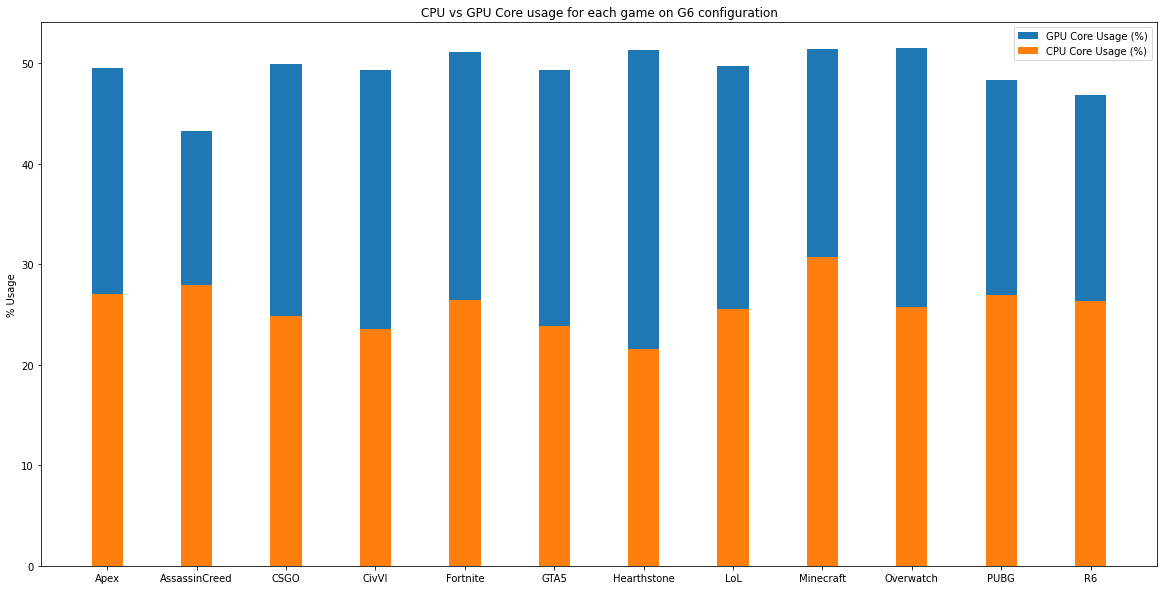

In [50]:
import matplotlib.pyplot as plt

gpu, cpu = df['GPU Core'].values, df['CPU Core'].values
labels = df.index
width = 0.35

plt.figure(figsize=(20, 10))

plt.bar(labels, gpu, width, label='GPU Core Usage (%)') # yerr=[],
plt.bar(labels, cpu, width, label='CPU Core Usage (%)') # yerr=[],

plt.title('CPU vs GPU Core usage for each game on G6 configuration')

plt.ylabel('% Usage')
plt.legend()

plt.show()